In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, Aer
# from qiskit.providers.aer import QasmSimulator, StatevectorSimulator
from qiskit.visualization import plot_histogram
%matplotlib inline

import numpy as np

sv_sim = Aer.get_backend('statevector_simulator')
aer_sim = Aer.get_backend('aer_simulator')

In [2]:
def run_circuit(qc, backend, num_shots=1024):
    result = execute(qc, backend, shots=num_shots).result()
    return dict(result.get_counts())

In [3]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.x(2).c_if(1,0)
qc.measure(2,2)
qc.draw()

┌───┐     ┌─┐                 
q_0: ┤ H ├──■──┤M├─────────────────
     └───┘┌─┴─┐└╥┘┌─┐              
q_1: ─────┤ X ├─╫─┤M├──────────────
          └───┘ ║ └╥┘   ┌───┐   ┌─┐
q_2: ───────────╫──╫────┤ X ├───┤M├
                ║  ║    └─╥─┘   └╥┘
                ║  ║ ┌────╨────┐ ║ 
c: 3/═══════════╩══╩═╡ c_1=0x0 ╞═╩═
                0  1 └─────────┘ 2

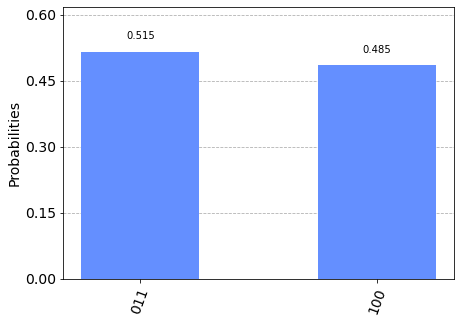

In [4]:
counts = run_circuit(qc, aer_sim)
plot_histogram(counts)

# Remember that from left to right order is MSB to LSB in qiskit

In [47]:
def measure(qc, idx, qbit, cbit, backend, num_shots=1024):
    if idx == 0:
        return 1
    elif idx == 1:
        qc.h(qbit)
    elif idx == 2:
        qc.rx(np.pi/2, qbit)
    elif idx == 3:
        None
    else:
        raise ValueError('Only 0,1,2,3 are valid idx')
    
    qc.measure(qbit, cbit)
    counts = run_circuit(qc, backend, num_shots=num_shots)
    
    index = 0
    for bit in qc.clbits:
        if bit == cbit:
            break
        index += 1

    print(index)

    expectation = 0

    for key in counts.keys():
        k = key.replace(' ', '')
        print('k:', k)
        if k[-(index+1)] == '0':
            expectation += counts[key]
        else:
            expectation -= counts[key]
            
    return float(expectation)/num_shots

In [56]:
q = QuantumRegister(1)
c1 = ClassicalRegister(1)
qc = QuantumCircuit(q,c1)
# qc.x(0)
qc.h(q)
qbit = q
cbit = c1[0]

# qc.measure(qbit, cbit)

# print(cbit)
meas = measure(qc, 3, qbit, cbit, aer_sim)
print(meas)
# plot_histogram(counts)

0
k: 1
k: 0
0.0078125


In [7]:
qc.clbits

[Clbit(ClassicalRegister(2, 'c0'), 0),
 Clbit(ClassicalRegister(2, 'c0'), 1),
 Clbit(ClassicalRegister(2, 'c1'), 0),
 Clbit(ClassicalRegister(2, 'c1'), 1)]

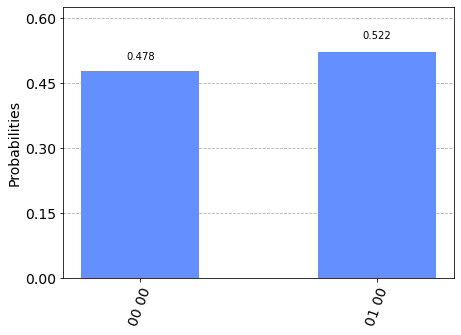

In [8]:
counts = run_circuit(qc, aer_sim)
plot_histogram(counts)

In [9]:
index = 0
for bit in qc.clbits:
    if bit == cbit:
        break
    index += 1

print(index)

for key in counts.keys():
    k = key.replace(' ', '')
    print(k[-(index+1)])

2
0
1


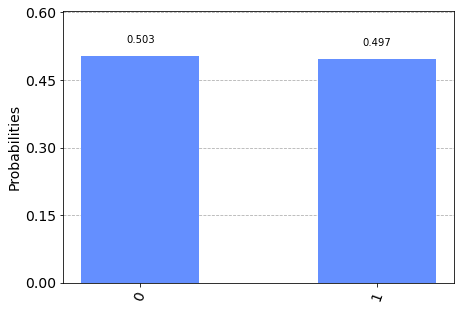

In [36]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
counts = run_circuit(qc, aer_sim)
plot_histogram(counts)

In [38]:
for k in counts.keys():
    print(k)

1
0


## Update alist

In [29]:
h = []
h.append([])
h[0].append([[1],[1/np.sqrt(2)]])
h.append([])
h[1].append([[3],[1/np.sqrt(2)]])

print('h\t\t',h)
print('h[0]\t\t',h[0])
print('h[0][0]\t\t',h[0][0])
print('h[0][0][1]\t',h[0][0][1])
print(len(h[0][0][0]))

h		 [[[[1], [0.7071067811865475]]], [[[3], [0.7071067811865475]]]]
h[0]		 [[[1], [0.7071067811865475]]]
h[0][0]		 [[1], [0.7071067811865475]]
h[0][0][1]	 [0.7071067811865475]
1


In [31]:
a = []

def foo(a):
    a.append([])
    a[-1].append(1)
    a[-1].append(2)
    a[-1].append(3)

foo(a)
foo(a)
print(a)

[[1, 2, 3], [1, 2, 3]]


# testing qite

In [32]:
N = 25
shots = 1000
db = 0.1
qc = '1q-qvm'
qbits = [0]
hm_list = []
hm_list.append([])
hm_list[0].append([[1],[1/np.sqrt(2)]])
hm_list.append([])
hm_list[1].append([[3],[1/np.sqrt(2)]])
delta = 0.1

In [1]:
h = [1,2,0]
print(str(h))

[1, 2, 0]
